PW 04 : Linear Regression
================================

In [1]:
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random as rd

%matplotlib inline

## Exercise 1  Get the data

In [ ]:
datafile = './lausanne-appart.xlsx'

dataset = pd.read_excel(datafile, names=['living_area','nb_rooms','rent'])

a) histogram to visualize the distribution of the renting price


In [ ]:
rent = dataset['rent'].values
living_area = dataset['living_area'].values

plt.figure(1,figsize = (8, 4))
plt.hist(rent)
plt.xlabel("Rent (CHF)")
plt.title('Rent distribution')
plt.xlim(np.min(rent),np.max(rent))
plt.show()

b) histogram to visualize the distribution of the living area

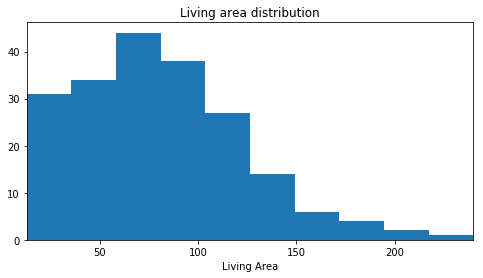

In [3]:
plt.figure(1,figsize = (8, 4))
plt.hist(living_area)
plt.xlabel("Living Area")
plt.title('Living area distribution')
plt.xlim(np.min(living_area),np.max(living_area))
plt.show()

c) scatter plot of living area as a function of renting price

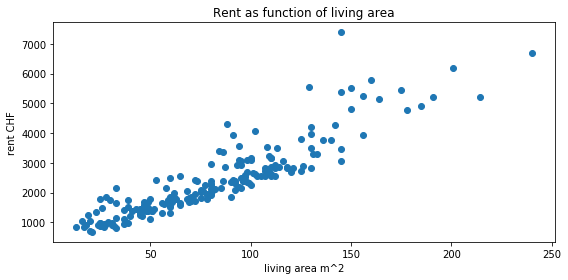

In [3]:
plt.figure(1,figsize = (8, 4))
plt.scatter(living_area,rent)
plt.title('Rent as function of living area')
plt.xlabel('living area m^2')
plt.ylabel('rent CHF')
plt.tight_layout()
plt.show()

## Exercise 2 Normal equations for linear regression

a) Implement Equation 3 assuming that
x
is the living area and
y
is the renting price. Use
numpy for the vector operations. Plot the computed line on top of the scatter plot of
exercise 1.

slope : 26.332424571995666
intercept : 240.07710726596173


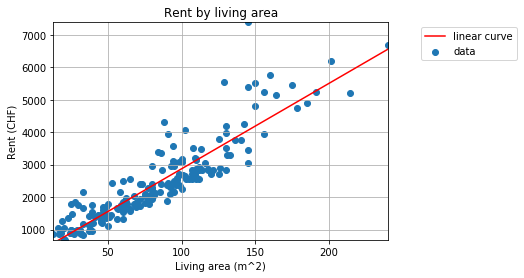

In [4]:
X = living_area
y = rent

Xtmp = np.c_[np.ones(X.shape[0]),X]

theta = inv(Xtmp.transpose().dot(Xtmp)).dot(Xtmp.transpose()).dot(y)
slope = theta[1]
intercept = theta[0]

print('slope :',slope)
print('intercept :',intercept)

x_curve = np.array(np.linspace(np.min(X),np.max(X),200))
y_curve = x_curve * slope + intercept

plt.title('Rent by living area')
plt.xlabel('Living area (m^2)')
plt.ylabel('Rent (CHF)')
plt.scatter(X,y)
plt.plot(x_curve,y_curve,color='red')
plt.legend(['linear curve','data'],bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(y),np.max(y))
plt.show()

b) Compute the overall cost value according to Equation 2.

In [5]:
def calcualteJ(X,y,slope,intercept):
    yHat = X * slope + intercept
    diff = y - yHat
    total = sum([i ** 2 for i in diff])
    J = (total)/(2*len(X))
    return J

J = calcualteJ(X,y,slope,intercept)

print("The total value of the cost function is" , J)

The total value of the cost function is 138034.95779787414


## Exercise 3 Batch gradient descent for linear regression

a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe ?

In [6]:
# Gradient descent function
def hypothesis(x,theta):
    return theta.transpose().dot(x)

def gradientDescentBatch(x,y,learning_rate,num_epoch,verbose=False):
    N = x.shape[0]     # number of sample
    D = x.shape[1]     # number of dimensions
    theta = np.ones(D) # init thetas to some values
    new_theta = np.ones(D)
    cost_array = []
    for itr in range(0,num_epoch):
        cost = 0.0
        delta = 0.0
        for j in range(0,D):
            for i in range (0,N):
                error = hypothesis(x[i],theta) - y[i]
                delta = delta + error * x[i,j]
                cost = cost + error**2
            new_theta[j] = theta[j] - learning_rate * (1.0/N) * delta
        theta = np.copy(new_theta) # update the thetas once the new values are all computed
        cost_array.append(cost)
        if verbose:
            print('itr : ',itr,' theta : ',theta)

    return [theta, cost_array]

lr = 0.00001
itr = 200

Xtmp = np.c_[np.ones(X.shape[0]),X]
tmp = gradientDescentBatch(Xtmp,y,lr,itr,verbose=False)
theta = tmp[0]



# for later
lr_batch = lr
itr_batch = itr
theta_batch = theta

slope_bgd = theta[1]
intercept_bgd = theta[0]

print('slope :',slope_bgd)
print('intercept :',intercept_bgd)

slope : 28.65186261767307
intercept : 1.3661915208241886


a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe ?

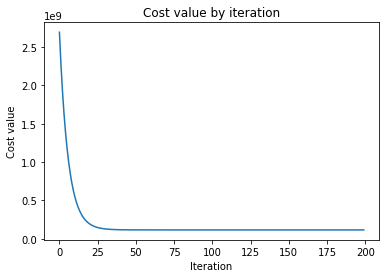

In [7]:
cost_array = tmp[1]

plt.title('Cost value by iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost value')
plt.plot(cost_array)

plt.show()


b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set ?

E.g. We can stop iterating, by chosing a theshold = T and check if

$$J{\theta_{n-1}} - J{\theta_{n}} < T. $$

We could also check if update criteria (in code delta) below a value. The reason being, that it should tend towards 0 if we approach the minimum.


c) Plot the computed line
h
θ
(
x
)
on top of the scatter plot of exercise 1

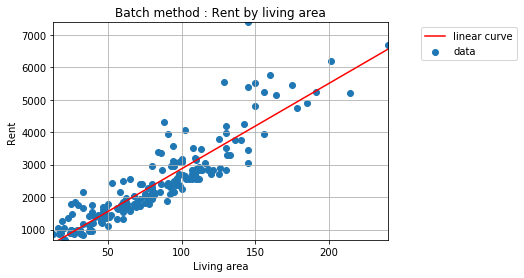

In [8]:
x_curve = np.array(np.linspace(np.min(X),np.max(X),200))
y_curve = x_curve * slope + intercept

plt.title('Batch method : Rent by living area')
plt.xlabel('Living area')
plt.ylabel('Rent')
plt.scatter(X,y)
plt.plot(x_curve,y_curve,color='red')
plt.legend(['linear curve','data'],bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(y),np.max(y))
plt.show()

d) Compute the final cost value according to Equation 2 and compare it to the one of
exercise 2. What can you conclude ?

In [10]:
J_bgd = calcualteJ(X,y,slope_bgd,intercept_bgd)


print("The total cost value is %s in comparison with the closed from solution %s" % (J_bgd ,J))

The total cost value is 144106.45423554225 and for closed from solution 138034.95779787414


## Exercise 4: Stochastic gradient descent for linear regression

In [11]:
def hypothesis(x,theta):
    return theta.transpose().dot(x)

# Gradient descent function Stochastic
def gradientDescentStochastic(x,y,learning_rate,num_iteration,verbose=False):
    N = x.shape[0]     # number of sample
    D = x.shape[1]     # number of dimensions
    theta = np.ones(D) # init the thetas to some values
    new_theta = np.ones(D)
    delta_list = []
    cost = 0   
    cost_previous = cost
    no_convergence = True
    delta = 0
    counter = 0
    while no_convergence:
        cost = 0
        counter +=1
        i = rd.choice(range(0, N))  # random sampling in the training set
        for j in range(0,D):       # for all dimensions
            error = hypothesis(x[i],theta) - y[i]
            delta = error * x[i,j]
            new_theta[j] = theta[j] - learning_rate * delta
            cost = cost + error**2
        theta = np.copy(new_theta) # update the thetas once the new values are all computed
        delta_list.append(delta)
        if num_iteration == counter:
            no_convergence = False
        if counter % len(x) == 0.0:
            if abs(cost_previous - cost) <= 500: # 
                no_convergence = False
            else:
                cost_previous = cost
        if verbose:
            print('itr : ', counter,' theta : ',theta,'cost : ',cost)
    return [theta, delta_list, counter]

lr = 0.00000001
itr = 1000000

Xtmp = np.c_[np.ones(X.shape[0]),X]
tmp = gradientDescentStochastic(Xtmp,y,lr,itr)
theta = tmp[0]

# for later
lr_stochastic = lr
itr_stochastic = itr
theta_stochastic = theta

slope = theta[1]
intercept = theta[0]

print('slope :',slope)
print('intercept :',intercept)

slope : 24.912416775660155
intercept : 1.2437503669522634


a) Plot the computed line
$h_{\theta}(x)$
on top of the scatter plot of exercise 1.

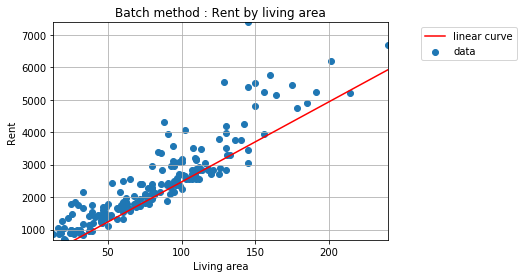

In [12]:
x_curve = np.array(np.linspace(np.min(X),np.max(X),200))
y_curve = x_curve * slope + intercept

plt.title('Batch method : Rent by living area')
plt.xlabel('Living area')
plt.ylabel('Rent')
plt.scatter(X,y)
plt.plot(x_curve,y_curve,color='red')
plt.legend(['linear curve','data'],bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(y),np.max(y))
plt.show()

b) How many samples do you need to visit for reaching the convergence ?

This is depended on chosen hyper-parameters (eg. learning rate, stop criteria) and implementation.

c) What kind of stopping criterion could we use here ?

As discussed in the lecture there is not one best solution. 
Here I chose to calculate the cost after every epoch and compare it to the cost of the last iteration through the data set. 
It is very important to choose the criteria in a way, that is is not impacted by the randomness of the data point selection. E.g. $$ \theta_{n-1} - \theta_{n}$$ Here, if two point are chosen, that are very close the $\theta$ does not chance alot. We stop the convergence too soon.

d) Compute the final cost value according to Equation 2 and compare it to the one of
exercise 2 and 3. What can you conclude ?

In [13]:
J_sto = calcualteJ(X,y,slope,intercept)

print("For the stochastic gradient desent ", J_sto,"For the badge gradient decent is ", J_bgd, "and for closed from solution ", J)

For the stochastic gradient desent  209808.02950199053 For the badge gradient decent is  144106.45423554225 and for closed from solution  138034.95779787414


We conclude that the closed mathematical form is the most accurate (as expected).

## Exercise 5: Review questions

a) The linear regression has a mathematicalclosed formsolution. Then, in which conditionswould we prefer a gradient descent algorithm to compute the regression model ?


In shot: Computational complexity and memory efficiency

A good explaination can be found here:

https://stats.stackexchange.com/questions/278755/why-use-gradient-descent-for-linear-regression-when-a-closed-form-math-solution

b) Outliers in a data set can be defined as values that are out of the "usual" range in comparison with other values. They typically come from noise or anomalies in the datacapturing process. What is the impact of an outlier in the stochastic gradient descent process ? What if we have many outliers ?Hint: look at the equation of the MSE, and at the equation of the update rule.

Typically outliers perturb the stochastic gradient descent process quite a bit. Due to the random nature in data point selection an increasing number of outliers have a bigger impact and make the process unstable.

In regards to the MSE: since the mean in unstable towards outliers it will be impacted by the outliers quite heavily.

In regards to the update rule: Since we update theta with every new data-point a outlier can move the descent in a unwanted fashion. 

c) In the case of stochastic gradient descent, what is the danger of having a too large or too small α value ? Could you think of a better (more advanced) strategy as the one stated on Slide 37 ?

If the learning rate is too large the "jumps" the algorithm makes can lead to it always going over the minimum (overshooting). Depending in the stop criteria we will never find the correct solution. 
If the learning rate is too small the updates are not big enough to advance in a timely fashion. In addition it increases the probability to get stuck in a local minimum.

There is a possibility to introduce an other hyperparameter called "momentum". It behaves very similar to the momentum described in physics. Imagine that our search of the local minimum is a ball on a surface with hills and creases valleys. The momentum help to make the seach not get stuck in a local minimum i.e rolling up a hill. (A more detailed explaination can be found online or will be discussed in later classes)

d) Let’s assume we expect that the target variable y has a dependency to the square and to the cube of one of the feature $x_d$ in our multi-variable training set(x1,...,xd,...,xD).How would you proceed ? Do we need to take precautions in terms of numerical stability ?

see slide 49.

e)Advanced. Could we use a descent algorithm without computing the gradient ? If yes, givea pseudo code of the algorithm to find(θ0,θ1) using a linear regression hθ(x) =θ0+θ1x.

This is possible we could do the following:

1) Initiate with random values for theta
2) Create small perturbations on theta
3) Is the MSE of the new theta > MSE old theta; if yes keep it else keep the old one
4) Repeat step 2-4 until stop criteria is met.